# PISA 2012 Data:
## Qualitative Reading Factors in Chinese and American Educational Culture
### by Nathaniel A. Miller

### Preliminary Wrangling

The dataset consists of a survey by the Programme for International Student Assessment (PISA) of about 510,000 15-16-year olds from OECD countries. They survey consists of evaluations of mathematical, scientific, and reading ability, and a questionnaire about various social, educational, and cultural beliefs and practices.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

In [2]:
# Read in the datafram
pisa = pd.read_csv('pisa2012.csv', encoding='cp1256')

C:\Users\Nathaniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Below is some simple wrangling and cleaning. Because the focus of the project is on visualizations rather than cleaning or statistical analysis, I have made some broad changes and noted where more nuance may be required on a future iteration.

In [4]:
# Basic cleaning for variables of interest; there are over 600 columns in the data set
# so it is unwieldy on my budget laptop
df = pisa[['CNT', 'STIDSTD', 'ST04Q01', 'ST11Q01', 'ST11Q02','ST11Q03',
           'ST11Q04', 'ST25Q01', 'ST28Q01', 'ST87Q01', 'ST87Q05', 'HISCED',
           'PV1MATH', 'PV1READ', 'PV1SCIE']]

In [5]:
# Rename columns from PISA keys
df.columns=['country', 'student_id', 'gender', 'mom_at_home', 'dad_at_home', 'bro_at_home', 'sis_at_home',
            'int_lang_at_home', 'books_at_home', 'feel_outsider', 'others_like_me', 'parents_highest_ed',
            'math_pv1', 'reading_pv1', 'science_pv1']

In [6]:
# Make copy before cleaning
df_original = df.copy()

In [7]:
# Most of this is categorical data; these are the binary categories, the ordinal ones will be dealt with below
cats = ['gender', 'mom_at_home', 'dad_at_home', 'bro_at_home', 'sis_at_home', 'int_lang_at_home']
for i in cats:
    df.loc[:, i] = df.loc[:, i].astype('category')

C:\Users\Nathaniel\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   country             485490 non-null  object  
 1   student_id          485490 non-null  int64   
 2   gender              485490 non-null  category
 3   mom_at_home         460559 non-null  category
 4   dad_at_home         441036 non-null  category
 5   bro_at_home         400076 non-null  category
 6   sis_at_home         390768 non-null  category
 7   int_lang_at_home    465496 non-null  category
 8   books_at_home       473765 non-null  object  
 9   feel_outsider       311776 non-null  object  
 10  others_like_me      310587 non-null  object  
 11  parents_highest_ed  473091 non-null  object  
 12  math_pv1            485490 non-null  float64 
 13  reading_pv1         485490 non-null  float64 
 14  science_pv1         485490 non-null  float64 
dtypes: category(6), f

In [9]:
# Check for missing data, there is a lot, especially for feels_outside and others_like me
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

mom_at_home            24931
dad_at_home            44454
bro_at_home            85414
sis_at_home            94722
int_lang_at_home       19994
books_at_home          11725
feel_outsider         173714
others_like_me        174903
parents_highest_ed     12399
dtype: int64

In [10]:
# One solution would be to split this into different dfs in order to preserve as much data as possibe
# That is unwieldy for the purpose of the project, so I'll just drop any rows with nulls.
df = df.dropna().reset_index(drop=True)

In [11]:
# THere are still over 200,000 rows
df.shape

(216178, 15)

In [12]:
# This allows us to see the proportion of rows remaining after dropping all NaNs. The quantity ranges from about 30-60%.
# Since the focus here is on visualizatoins, the distortion introduced by dropping all NaNs could be figured back into
# account at a later date. For our countries of interest, the proportions remaining are pretty close, 46% for the US
# and 53% for China.
ser = df.country.value_counts()/df_original.country.value_counts()
ser['United States of America'], ser['China-Shanghai']

(0.4642426677380474, 0.5296503766660228)

In [13]:
# About the same proportion of males and females remain, we probably haven't introduced any major distortion here
df.gender.value_counts()/df_original.gender.value_counts()

Female    0.446838
Male      0.443687
Name: gender, dtype: float64

In [14]:
# save csv
df.to_csv('pisa_2012_clean.csv', index=False)

In [15]:
df = pd.read_csv('pisa_2012_clean.csv')

### What is the structure of your dataset?

> The dataset consist of over 600 columns with responses by parents, teachers and students, along with 5 plausible values for each of reading, science, and math evaluations.

### What is/are the main feature(s) of interest in your dataset?

> There is too much to choose from! I want to compare some factors that contribute to higher reader scores China's higher reading scores than the US among secondary students. I've kept the columns with the first plausible value, following the *PISA Data Analysis Manual*, p. 43:
"Usually, five plausible values are allocated to each student on each performance scale. Statistical analyses should be performed independently on each of these five plausible values and results should be aggregated to obtain the final estimates of the statistics and their respective standard errors. It is worth noting that these standard errors will consist of sampling uncertainty and test unreliability. The plausible value methodology, combined with the replicates, requires that the parameter, such as a mean, a standard deviation, a percentage or a correlation, has to be computed 405 times (i.e. 5 plausible values by one student final weights and 80 replicates) to obtain the final estimate of the parameter and its standard error. Chapter 8 describes an unbiased shortcut that requires only 85 computations. Working with one plausible value instead of five will provide unbiased estimate of population parameters but will not estimate the imputation error that reflects the influence of test unreliability for the parameter estimation. With a large dataset, this imputation error is relatively small. However, the smaller the sample size, the greater the imputation error."


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am particularly interest in the reading scores, and two out of the nine questionaire items about social belonging: "You feel like an outsider," and "You are liked by other students." The responses are given with a Likert-like 4-point scale from strongy agree to strongly disagree.

## Univariate Exploration


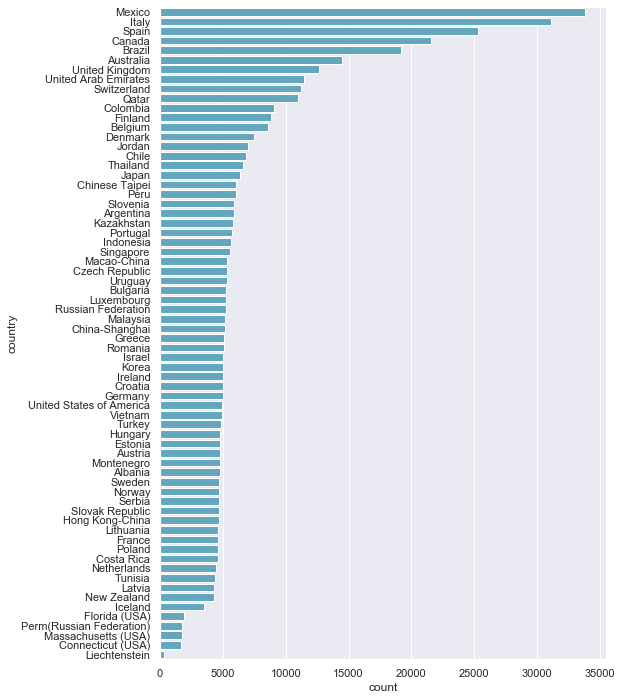

In [19]:
# Note that FL, CT and MA are counted separately from the rest of USA
base_color = sns.color_palette("GnBu_d")[3]

country_counts = df_original['country'].value_counts()
country_order = country_counts.index

sns.set()
plt.figure(figsize=(8,12))
sns.countplot(data = df_original, y = 'country', color = base_color, order = country_order)

> The first thing I plot is number of responses by country in the original dataset (before I removed non-nulls). Which counties are most represented? Below we will see that the top five, Mexico, Italy, Spain, Canada, Brazil, have disproportionately more students participating in the PISA evaluation. I wasn't able to determine why this is, if it is methodological or the result of variations in degree of government cooperation. The number of participating students in China and the US is similiar.

In [20]:
# group the reading score by country to get an order
by_country = df.groupby('country')['reading_pv1'].mean().sort_values(ascending=False)

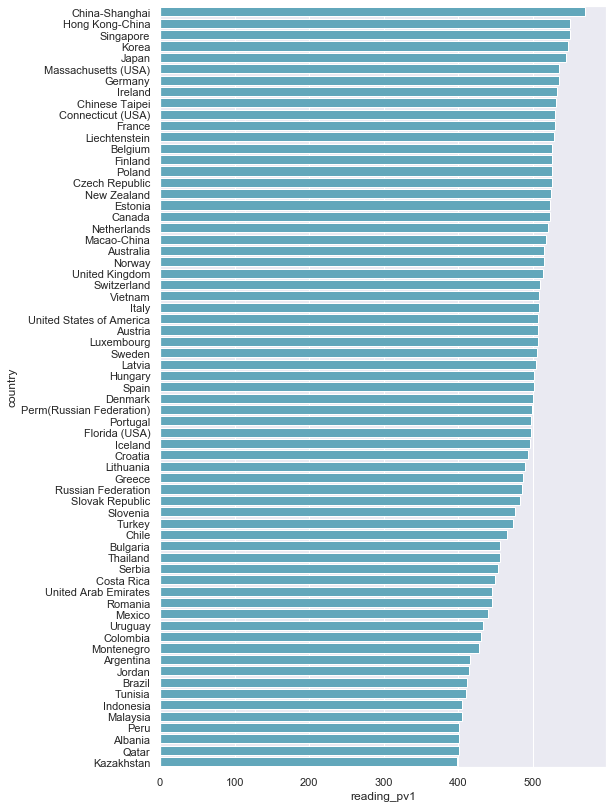

In [21]:
# plot a bar chart
sns.set()
plt.figure(figsize=(8,14))
sns.barplot(y = 'country', x = 'reading_pv1', data = df, order = by_country.index, color = base_color, ci=None)

In [22]:
df.reading_pv1.max()

878.7532

> Where do the US and China fall in comparison to other countries? As is well-known, Chinese students perform very well in all levels of PISA's assessment, and the US does not. The USA in 2012 fell in 27th place for reading among the 67 countries measured (this would vary a bit if we subtract Florida, Connecticut, and Massachusetts and incorporated them in the US, and depending on how we count some of the other countries, but serves as a good approximation of mediocre American performance).

In [23]:
# Get USA's rank in the reading measure
list(by_country.index).index("United States of America"), len(by_country)

(27, 67)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

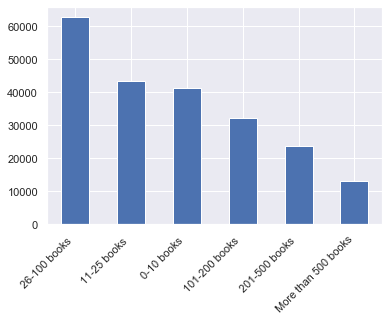

In [24]:
df['books_at_home'].value_counts().plot(kind="bar", rot = 45)
plt.xticks(ha='right')

> Another interesting measure included in the data is the number of books children report having at home. How many do they have? As we an see, the majority report having few than 100.

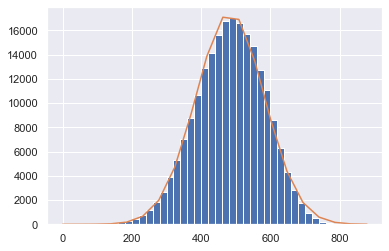

In [25]:
# Normally distributed Q-Q plot
bins = np.arange(100, df.reading_pv1.max(), 20)
plt.hist(df.reading_pv1, bins = bins);

samp_mean = df['reading_pv1'].mean()
samp_sd = df['reading_pv1'].std()

x = np.linspace(df.reading_pv1.min(), df.reading_pv1.max(), 20)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df.shape[0] * 20 # scale the distribution height

plt.plot(x, y)

> Globally, I expected the distribution of reading scores to be normally distributed. It was, as is confirmed by this quick Q-Q plot. This is useful also to confirm I did not introduce any global distortions as the result of dropping over half my data. What about reading performance in relation to math performance, globally?

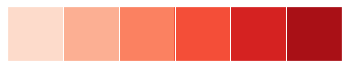

In [26]:
sns.palplot(sns.color_palette("Reds"))


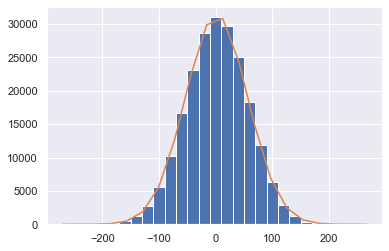

In [27]:
# Feature engineering there does not seem to be much of a difference between "right brain" and "left brain" students
# This is also normally distributed

df['diff'] = (df.reading_pv1 - df.math_pv1)
bins = np.arange(df['diff'].min(), df['diff'].max(), 20)
plt.hist(df['diff'], bins = bins)

samp_mean = df['diff'].mean()
samp_sd = df['diff'].std()

x = np.linspace(df['diff'].min(), df['diff'].max(), 20)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df.shape[0] * 20 # scale the distribution height

plt.plot(x, y);

> Are students who perform better in math worse at reading and vice versa? This is a popular conception, but it is not the case. I subtracted math performance from reading performance and found that those who performed better at reading (positive numbers in the plot) and those who performed worse (negative numbers) are evenly distributed around 0 -- those who have equal aptitude in both reading and math. I will look at national level results next.

In [28]:
# The cells below confirm that although the difference in reading/math performance is normally distributed
# there are significant national differences.
China_Shanghai = df.loc[df['country'] == 'China-Shanghai']
USA = df.loc[df['country'] == 'United States of America']

In [29]:
# US performance in reading is, on average, 14 points higher than math
USA['diff'].mean()

14.629522198182604

In [30]:
USA.reading_pv1.mean()

506.91123487667676

In [31]:
USA.math_pv1.mean()

492.28171267849416

In [32]:
# While Chinese performance in math is over 46 points higher than reading
China_Shanghai['diff'].mean()

-46.35004478482859

In [33]:
China_Shanghai.reading_pv1.mean()

569.5420590080234

In [34]:
China_Shanghai.math_pv1.mean()

615.8921037928519

In [35]:
China_Shanghai['diff'].min()

-216.65409999999997

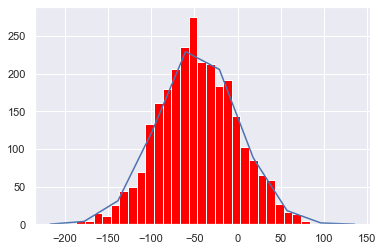

In [36]:
df['diff'] = (China_Shanghai.reading_pv1 - China_Shanghai.math_pv1)
bins = np.arange(China_Shanghai['diff'].min(), China_Shanghai['diff'].max(), 10)
plt.hist(China_Shanghai['diff'], bins = bins, color = 'red')

samp_mean = China_Shanghai['diff'].mean()
samp_sd = China_Shanghai['diff'].std()

x = np.linspace(China_Shanghai['diff'].min(), China_Shanghai['diff'].max(), 10)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= China_Shanghai.shape[0] * 10 # scale the distribution height

plt.plot(x, y);

> Are Chinese students better at math or reading? They are better at math on average; this is likely the result of prioritization within the educational system. Their performance is normally distributed around -46 (46 points better at math). I want to compare this with the USA.

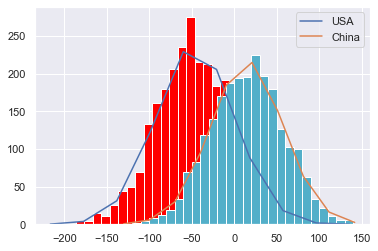

In [37]:
# This can go in final slide

df['diff'] = (China_Shanghai.reading_pv1 - China_Shanghai.math_pv1)
bins = np.arange(China_Shanghai['diff'].min(), China_Shanghai['diff'].max(), 10)
plt.hist(China_Shanghai['diff'], bins = bins, color = 'red')

samp_mean = China_Shanghai['diff'].mean()
samp_sd = China_Shanghai['diff'].std()

x = np.linspace(China_Shanghai['diff'].min(), China_Shanghai['diff'].max(), 10)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= China_Shanghai.shape[0] * 10 # scale the distribution height

plt.plot(x, y);

df['diff'] = (USA.reading_pv1 - USA.math_pv1)
bins = np.arange(USA['diff'].min(), USA['diff'].max(), 10)
plt.hist(USA['diff'], bins = bins, color = base_color)

samp_mean = USA['diff'].mean()
samp_sd = USA['diff'].std()

x = np.linspace(USA['diff'].min(), USA['diff'].max(), 10)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= USA.shape[0] * 10 # scale the distribution height

plt.plot(x, y)
plt.legend(['USA', 'China']);

> This shows the slight overperformance of US students in reading versus the overperformance of Chinese students in math. It must be born in mind that in absolute terms, Chinese students perform better in both measures on average than American students.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I created a column to express difference in performance between math and reading assessments. The measures of these were normally distributed, but Chinese students overperform in mathematics while US students overperform slightly in reading. The results were not particularly surprising to me, but they lay the groundwork for more interesting questions around individual student attitutudes towards reading performance in the next section.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I dropped non-nulls, grouped the data by country, and changed some of the data types to categorical. 

## Bivariate Exploration

> Here I will explore the question, what correlates to high reading scores. I have isolated 4 features, all with categorical variables (except one that is technically discrete numeric data): the number of books reported by students at home, the highest level of education attained by parents, and two questions on student's sense of belonging. The first two I expected to correlate to higher reading levels, but I was not certain about the second two.

In [38]:
df[df['gender'] == "Male"].reading_pv1.mean() - df[df['gender'] == "Female"].reading_pv1.mean()

-32.59463376872981

In [39]:
 df[df['gender'] == "Male"].math_pv1.mean() - df[df['gender'] == "Female"].math_pv1.mean()

13.947008652628881

In [40]:
# lists to order categorical variables. num_books is discrete numeric, but since we don't have further data on the specific
# numbers within each range, no binning is possible and I'll treat them as ordinal categoricals. 
num_books = ['0-10 books ', '11-25 books ', '26-100 books ', '101-200 books ', '201-500 books ', 'More than 500 books']
others_like_likert = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
feel_outsider_likert = others_like_likert
parents_highest_likert = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']

In [41]:
# dict for for-loop below to order categorical data
likert_dict = {'books_at_home': num_books, 'feel_outsider': feel_outsider_likert,
                'others_like_me': others_like_likert, 'parents_highest_ed': parents_highest_likert}

In [42]:
# function to order the categorical columns
def likert_cat(column, likert_list):
    likert_classes = likert_list
    column_classes = pd.api.types.CategoricalDtype(ordered = True, categories = likert_classes)
    df[column] = df[column].astype(column_classes);

In [43]:
# for-loop with function call to handle everything in likert_dict
for k, v in likert_dict.items():
    likert_cat(k, v)

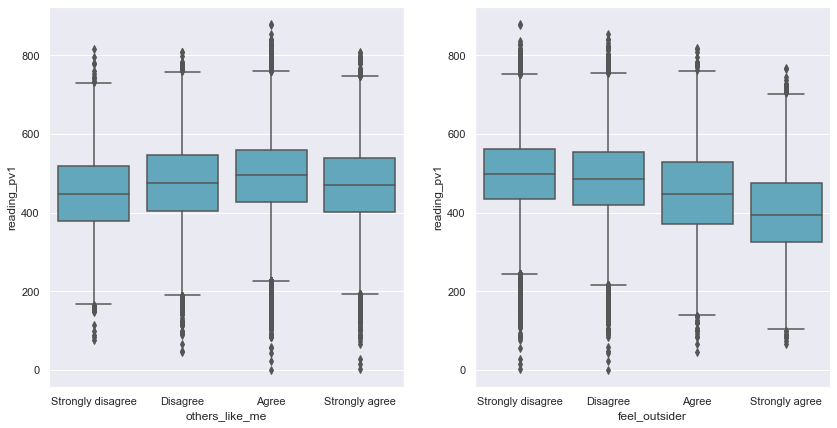

In [44]:
# seaborn boxplots of 2 sense of belonging questions
f, axes = plt.subplots(1, 2)
f.set_size_inches(14, 7)
sns.boxplot(data= df, x = 'others_like_me', y = 'reading_pv1', color=base_color, ax=axes[0])
sns.boxplot(data= df, x = 'feel_outsider', y = 'reading_pv1', color=base_color, ax=axes[1]);

> Would more socially isolated students read more? Apparently not. Globally, reading performance (looking at the median and interquaretile range) increases depending on how liked students feel (except those who responded "strongly agree"), while there is a significant decrease in performance depending on how strongly students "feel like an outsider."

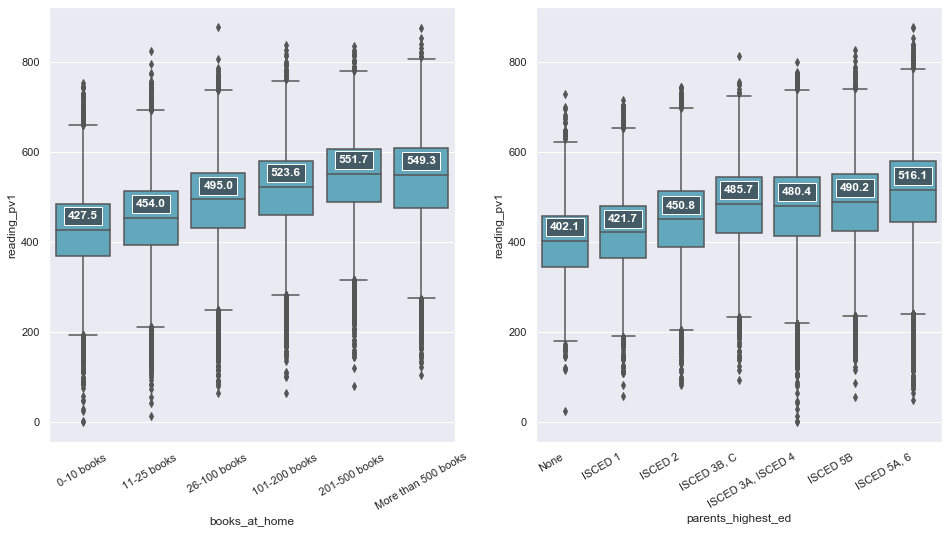

In [45]:
# annotation adapted from https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value
# plot the books_at_home and parents_highest_ed columns against reading performance

# plot subplots figures, axes
f, axes = plt.subplots(1, 2)
f.set_size_inches(16, 8)

# instantiate first plot
box_plot = sns.boxplot(data= df, x = 'books_at_home', y = 'reading_pv1', color=base_color, ax=axes[0])

#assign median and display position variables for annotation for-loop
medians = df.groupby(['books_at_home'])['reading_pv1'].median()
vertical_offset = df['reading_pv1'].median() * 0.05 # offset from median for display

#print annotation
for xtick in box_plot.get_xticks():
    medians[xtick] = '{:0.1f}'.format(medians[xtick])
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='bold', bbox=dict(facecolor='#445A64'))
    
#repeat
box_plot2 = sns.boxplot(data= df, x = 'parents_highest_ed', y = 'reading_pv1', color=base_color, ax=axes[1])

medians = df.groupby(['parents_highest_ed'])['reading_pv1'].median()
vertical_offset = df['reading_pv1'].median() * 0.05 # offset from median for display

for xtick in box_plot2.get_xticks():
    medians[xtick] = '{:0.1f}'.format(medians[xtick])
    box_plot2.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='bold', bbox=dict(facecolor='#445A64'));

plt.xticks(rotation=30, ha='right')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=30);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a clear correlation both between the number of books students report having at home and parents' highest education level. Since these are probably highly multicollinear variables, that both are correlated to student reading performance is not surprising.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didn't plot this, but globally boys outperform girls by 14 points of average in math, while girls outperform boys by 33 points on average in reading.

## Multivariate Exploration

> Here I will continue my exploration of the same four categories for parent education and student social acceptance, but comparing China and the US students' reading performance.

In [46]:
# In the plot below, note that the US lacks values for ISCED 3B,C because this corresponds to 
df[df['country']=='United States of America'].parents_highest_ed.value_counts()

ISCED 5A, 6          1028
ISCED 3A, ISCED 4     750
ISCED 5B              337
ISCED 2               116
ISCED 1                62
None                   18
ISCED 3B, C             0
Name: parents_highest_ed, dtype: int64

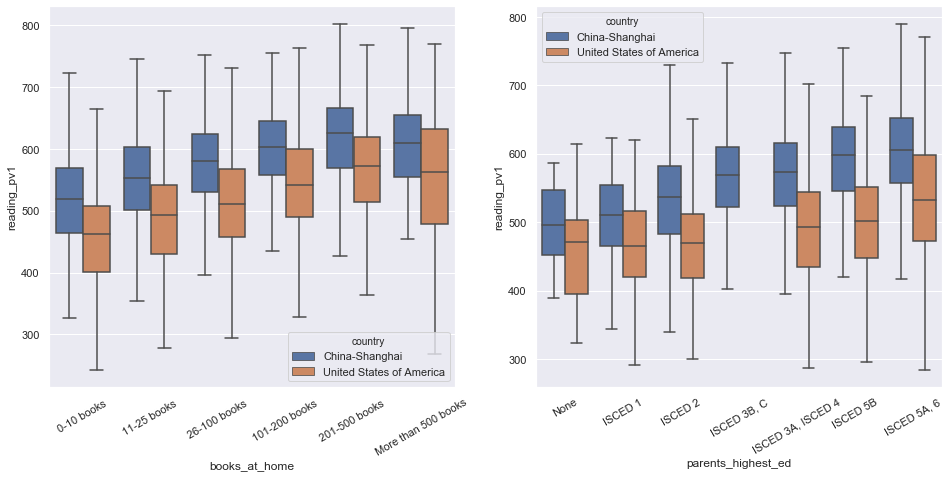

In [47]:
df_sub = df.loc[df['country'].isin(['United States of America', 'China-Shanghai'])]

f, axes = plt.subplots(1, 2)
f.set_size_inches(16, 7)

sns.boxplot(data= df_sub, x = 'books_at_home', y = 'reading_pv1',
           hue = 'country', ax=axes[0], showfliers=False)
axes[0].set_xticklabels(labels = num_books, rotation=30)


sns.boxplot(data= df_sub, x = 'parents_highest_ed', y = 'reading_pv1',
           hue= 'country', ax=axes[1], showfliers=False)
axes[1].set_xticklabels(labels = parents_highest_likert, rotation=30);


> How do parental education and its proxy books at home affect student performance if we compare China and the US? Although in both countries reading performance increases with parents' educational level and number of books at home, in terms of absolute performance, parents' educational level does not constrain Chinese students, or rather, it is not a sufficient explanatory variable for US students' lower performance; we see, for example, that students' with parents who have reached ISCED 3 (high school, A-levels) have a visibly superior median and interquartile range for their reading scores than American students with BAs. Chinese students also perform better with fewer books at home.

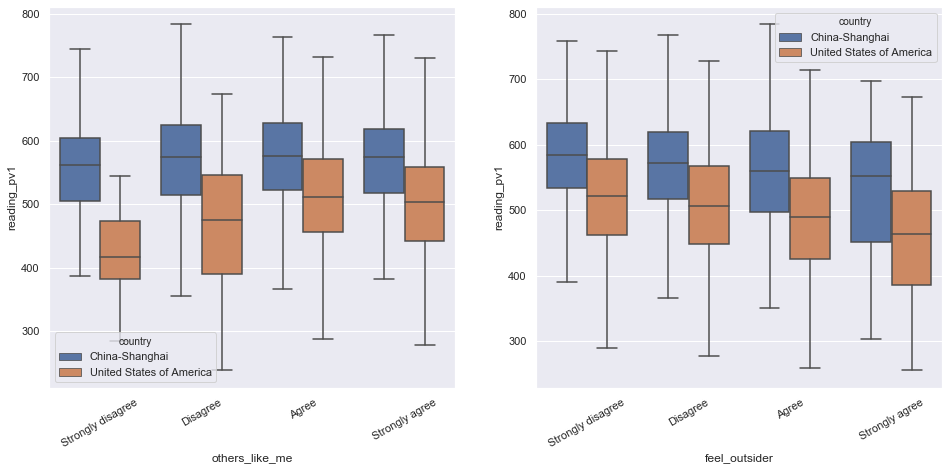

In [48]:
# for socialization factors
f, axes = plt.subplots(1, 2)
f.set_size_inches(16, 7)

sns.boxplot(data= df_sub, x = 'others_like_me', y = 'reading_pv1',
           hue = 'country', ax=axes[0], showfliers=False)
axes[0].set_xticklabels(labels = others_like_likert, rotation=30)

sns.boxplot(data= df_sub, x = 'feel_outsider', y = 'reading_pv1',
           hue = 'country', ax=axes[1], showfliers=False)
axes[1].set_xticklabels(labels = feel_outsider_likert, rotation=30);

> How do measures of social acceptance correspond to different performance levels in China and the US. This is the most interesting result. While in the US students who felt others disliked them performed much more poorly on reading evaluations, there is very little discnible variation amongst the four responses for Chinese students. Among American students, the more strongly the students feel like outsiders, the lower their reading performance. There is a similar correlation among Chinese students, but it is not as stark. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!